회귀이지만 나는 분류로 바꿔 보았다 그냥 그러고 싶었다

In [3]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_diabetes

In [4]:
df = load_diabetes()

In [5]:
df2 = df

In [6]:
df

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [7]:
target = df['target']

In [8]:
target_category = np.where(target < 100, 0, np.where(target < 200, 1, 2))

In [9]:
df2['target'] = target_category

In [10]:
df2

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]]),
 'target': array([1, 0, 1, 2, 1, 0, 1, 0, 1, 2, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0,
        0, 2, 1, 2, 1, 0, 1, 2, 1, 0, 2, 0, 0, 1, 2, 2, 2, 0, 1, 0, 0, 0,
        2, 0, 1, 1, 0, 1, 1, 2, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1,
        1, 0, 1, 1, 0, 2, 2, 1, 0, 0, 1, 2, 2, 1, 1, 0, 0, 2, 0, 1, 0, 1,
        0, 1, 0, 1, 0, 0, 0, 1, 1, 2, 0, 0, 1, 1, 2, 1, 0, 

In [11]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [12]:
x = df2['data']
y = df2['target']

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x,y, stratify=y, random_state=777, test_size= 0.3)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((309, 10), (133, 10), (309,), (133,))

In [14]:
train_scores = []
test_scores = []
for k in np.arange(1, 10, 1):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(x_train, y_train)
    train_score = knn_model.score(x_train, y_train)
    test_score = knn_model.score(x_test, y_test)
    test_scores.append(test_score)
    train_scores.append(train_score)


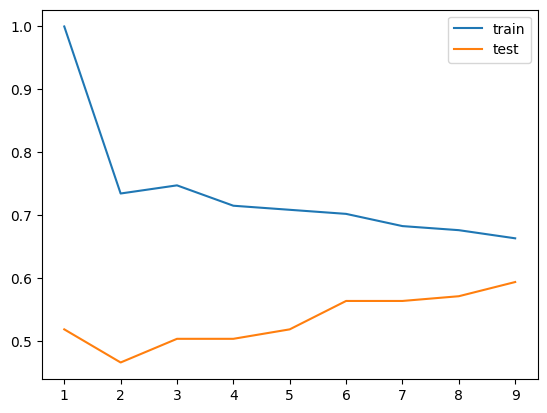

In [15]:
plt.plot(np.arange(1, 10, 1), train_scores, label = 'train')
plt.plot(np.arange(1, 10, 1), test_scores, label = 'test')

plt.legend()
plt.show()

In [16]:
df['feature_names']

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [17]:
x.mean(axis=0)

array([-1.44429466e-18,  2.54321451e-18, -2.25592546e-16, -4.85408596e-17,
       -1.42859580e-17,  3.89881064e-17, -6.02836031e-18, -1.78809958e-17,
        9.24348582e-17,  1.35176953e-17])